## PREDICTING TDs

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import os

# Ruta de la carpeta abierta en Visual Studio Code
folder_path = os.getcwd()

# Obtener la lista de archivos en la carpeta
file_list = os.listdir(folder_path)

# Imprimir la lista de archivos
print(file_list)


['nextgenstats-passing.ipynb', 'ngs_2022_passing.csv.gz', 'ngs_2022_receiving.csv.gz', 'play_by_play_2020.csv', 'play_by_play_2021.csv', 'play_by_play_2022.csv', 'predictingTDs.ipynb', 'qb passing yards.ipynb', 'receiver gpt.ipynb']


In [3]:

# Within each season folder is a play-by-play CSV
# We'll need this to create our ML model 
# Let's just take seasons 2019-2021:  
target_seasons = [x for x in file_list
                  if ('2020' in x) | 
                  ('2021' in x) | 
                  ('2022' in x)]

In [4]:
folder_path

'c:\\Users\\juana\\OneDrive\\Escritorio\\ML_NFL'

In [5]:
# Directorio base del proyecto
project_dir = r"C:\Users\juana\OneDrive\Escritorio\ML_NFL"  # Ruta de la carpeta ML_NFL en tu escritorio

# Archivos CSV objetivo
target_files = ["play_by_play_2020.csv", "play_by_play_2021.csv", "play_by_play_2022.csv"]

# Lista de rutas de archivos completas
data_files = [os.path.join(project_dir, file_name)
              for file_name in target_files]

print(data_files)


['C:\\Users\\juana\\OneDrive\\Escritorio\\ML_NFL\\play_by_play_2020.csv', 'C:\\Users\\juana\\OneDrive\\Escritorio\\ML_NFL\\play_by_play_2021.csv', 'C:\\Users\\juana\\OneDrive\\Escritorio\\ML_NFL\\play_by_play_2022.csv']


In [6]:
# Inicializar una lista para almacenar los DataFrames
dfs = []

# Loop a través de tus nombres de archivo, abrirlos y agregarlos a la lista
for fn in data_files:
    dfs.append(pd.read_csv(fn))

# Concatenar los DataFrames de la lista en un solo DataFrame
df = pd.concat(dfs, ignore_index=True)

# Imprimir el tamaño del DataFrame
print(df.shape)


C:\Users\juana\AppData\Local\Temp\ipykernel_16556\3838110477.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(fn))
C:\Users\juana\AppData\Local\Temp\ipykernel_16556\3838110477.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(fn))
C:\Users\juana\AppData\Local\Temp\ipykernel_16556\3838110477.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,222,224,226,243,244,245,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(fn))


(149373, 372)


In [7]:
df.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,1.294838,0.503370,4.275047,2.0,0.619306,0.239695,0.515058,48.494154
3,93,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,0.857214,NaN,NaN,NaN,NaN,NaN,0.413357,-41.335732
4,118,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,-0.454665,NaN,NaN,NaN,NaN,NaN,0.446920,-44.692025
5,143,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,-1.780660,NaN,NaN,NaN,NaN,NaN,0.681858,-68.185812
6,165,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,-0.538702,1.054806,4.119796,2.0,0.837606,0.374325,0.971992,2.800822
7,197,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,2.147877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,226,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,ARI,away,SF,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,245,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,ARI,away,SF,...,0,1,-0.414011,0.715011,4.777031,3.0,0.676852,0.231105,0.442755,55.724481


In [8]:
df.sample(5)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
47820,753,2020_19_TB_NO,2021011701,NO,TB,POST,19,TB,away,NO,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113375,3145,2022_05_TEN_WAS,2022100909,WAS,TEN,REG,5,WAS,home,TEN,...,0,0,1.511997,NaN,NaN,NaN,NaN,NaN,0.802270,19.772995
46377,905,2020_18_CHI_NO,2021011001,NO,CHI,POST,18,CHI,away,NO,...,1,1,-3.283267,NaN,NaN,NaN,NaN,NaN,0.940908,5.909187
57801,3463,2021_04_CLE_MIN,2021100305,MIN,CLE,REG,4,CLE,away,MIN,...,0,1,1.558052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136636,2505,2022_15_CIN_TB,2022121807,TB,CIN,REG,15,TB,home,CIN,...,0,0,-0.794125,0.284497,4.432326,2.0,0.999122,0.980623,0.590764,40.923560


In [9]:
df.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

## Explore features
What correlates with touchdowns?
Use yards and previous season performance to predict touchdowns?

In [10]:
# Although this dataset has a lot of different
# features, you most likely don't need to use
# all of them to create your first predictive 
# model. We should start simple with things that
# correlate with quarterback touchdowns 

# Let's take some basic quarterback stats 
qb_feats = ['season', 'passer_id', 'passer', 'pass', 
            'complete_pass', 'interception', 
            'sack', 'yards_gained', 'touchdown']

# Let's group by season and who the passer was 
groupby_feats = ['season', 'passer_id', 'passer'] 

# group by and aggregate by sum 
qb_df = (df
         .loc[:, qb_feats]
         .groupby(groupby_feats, 
                  as_index=False)
         .sum())

# random sample of 10 player-seasons 
qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown
292,2022,00-0033555,M.Hollins,1,1.0,0.0,0.0,4.0,0.0
231,2021,00-0036322,J.Jefferson,4,2.0,0.0,0.0,35.0,0.0
251,2022,00-0026300,J.Johnson,17,8.0,0.0,2.0,70.0,0.0
335,2022,00-0036358,C.Lamb,1,0.0,0.0,0.0,0.0,0.0
92,2020,00-0034960,J.Meyers,2,2.0,0.0,0.0,43.0,2.0
88,2020,00-0034869,S.Darnold,446,217.0,11.0,35.0,2185.0,12.0
273,2022,00-0032156,T.Siemian,29,15.0,1.0,2.0,176.0,1.0
209,2021,00-0034960,J.Meyers,2,2.0,0.0,0.0,45.0,0.0
239,2021,00-0036945,J.Fields,374,159.0,10.0,36.0,1973.0,9.0
154,2021,00-0031136,C.Boswell,1,0.0,0.0,0.0,0.0,0.0


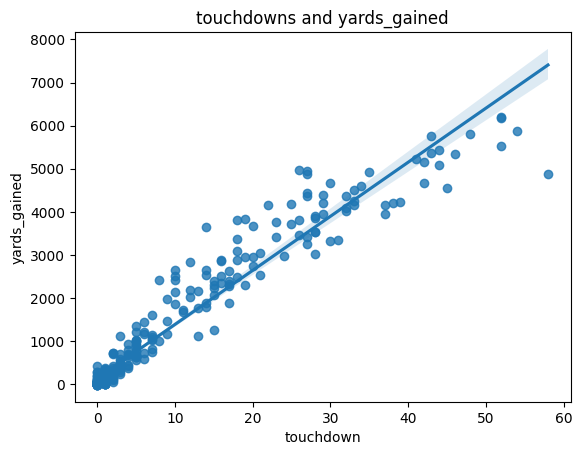

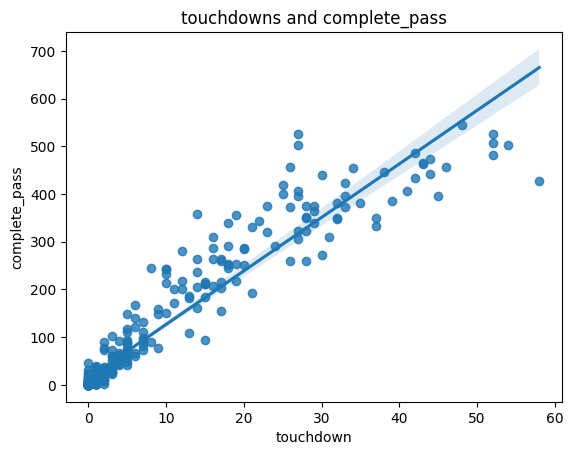

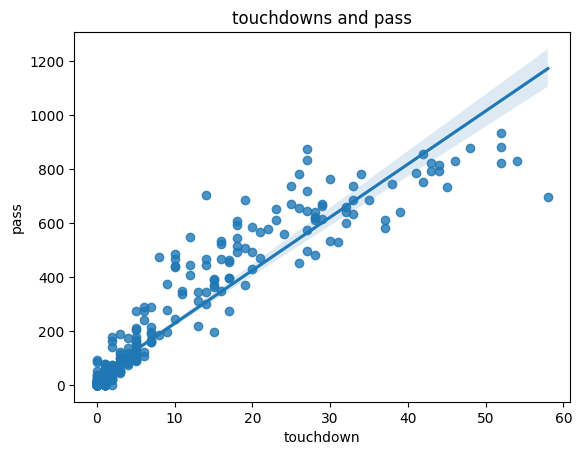

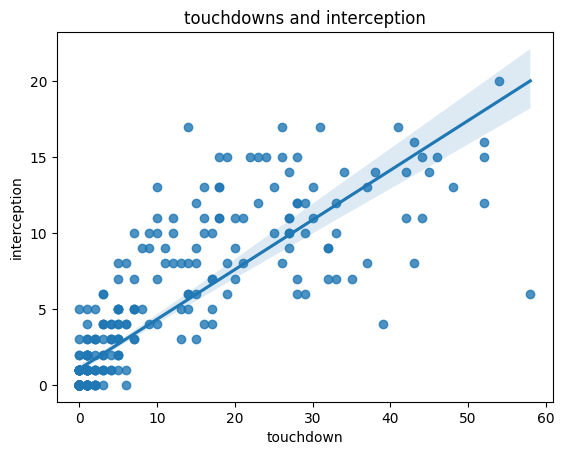

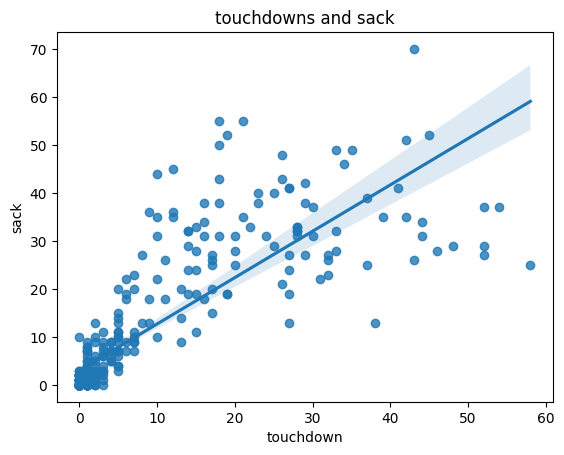

In [11]:
# let's see what correlates with touchdowns 
for y in ['yards_gained', 'complete_pass', 
          'pass', 'interception','sack']:
  sns.regplot(data=qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()

In [12]:
# Apparently knowing yards gained, 
# completed passes, attempted passes, 
# interceptions, and sacks all correlate with
# touchdowns. Let's see if this is the case for
# _next season_ touchdowns 

# make a copy of the qb dataframe 
_df = qb_df.copy()

# add 1 to season
_df['season'] = _df['season'].add(1)

# merge this back on the original qb dataframe
# specify "on=[]" so we only join on specific 
# columns; specify "suffixes=()" so the duplicate
# column names get a suffix appended to them; 
# specify "how='left'" so this is a left join 
new_qb_df = (qb_df
             .merge(_df, 
                    on=['season', 'passer_id', 'passer'], 
                    suffixes=('', '_prev'), 
                    how='left'))

new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
211,2021,00-0035156,J.Fox,3,2.0,0.0,0.0,38.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
182,2021,00-0033357,T.Hill,158,78.0,5.0,9.0,1027.0,5.0,161.0,88.0,2.0,15.0,997.0,5.0
225,2021,00-0035993,T.Huntley,242,122.0,4.0,18.0,1177.0,6.0,22.0,9.0,0.0,1.0,99.0,0.0
51,2020,00-0032009,A.Humphries,1,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
34,2020,00-0030279,K.Allen,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
304,2022,00-0034418,C.Wilson,1,0.0,0.0,1.0,-6.0,0.0,3.0,3.0,0.0,0.0,88.0,0.0
206,2021,00-0034869,S.Darnold,487,243.0,13.0,35.0,2512.0,10.0,446.0,217.0,11.0,35.0,2185.0,12.0
180,2021,00-0033307,K.Bourne,1,1.0,0.0,0.0,25.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
353,2022,00-0037740,G.Wilson,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
84,2020,00-0034796,L.Jackson,533,273.0,11.0,37.0,3328.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN


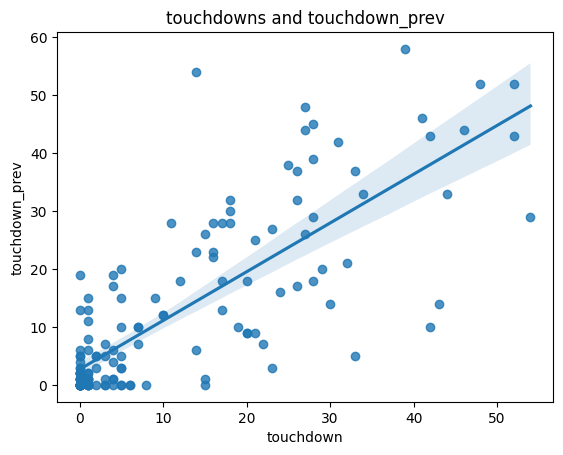

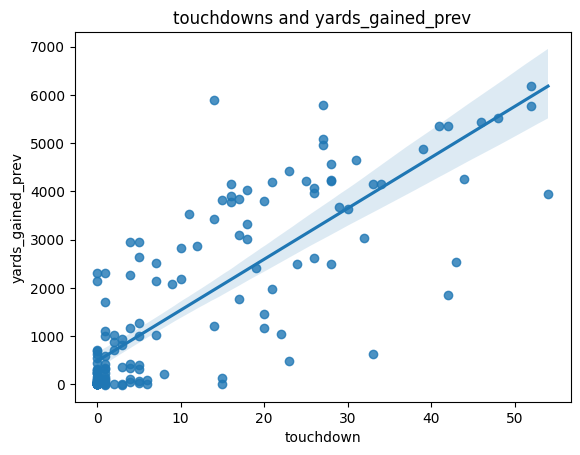

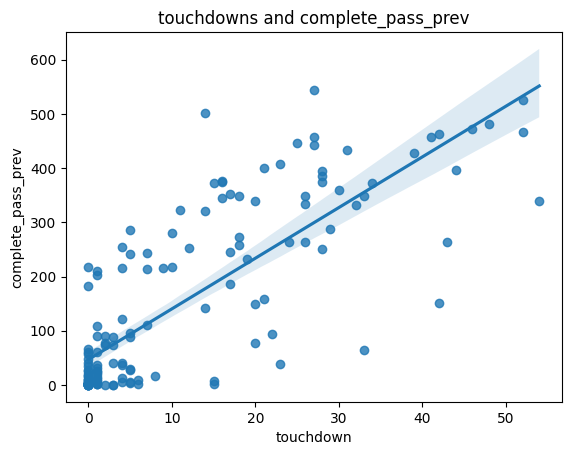

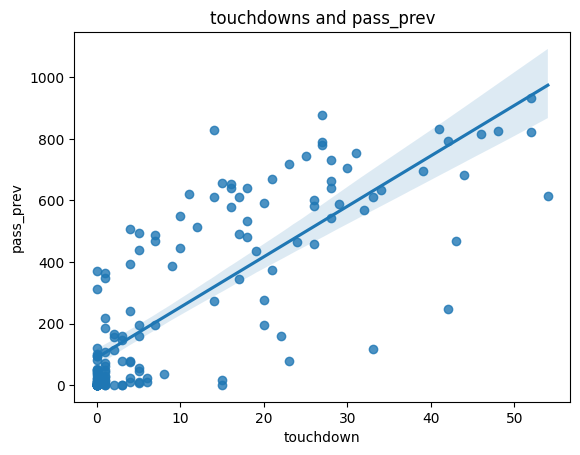

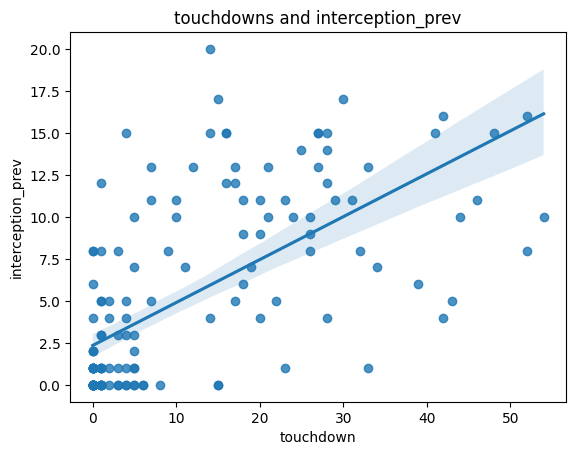

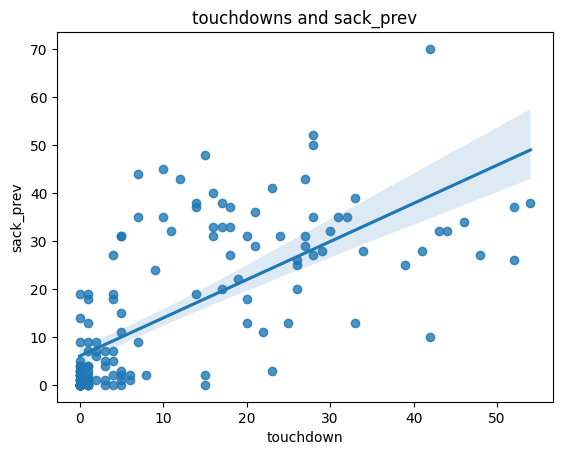

In [13]:
# let's see what correlates with 
# next season touchdowns 
for y in ['touchdown_prev','yards_gained_prev', 
          'complete_pass_prev', 'pass_prev', 
          'interception_prev','sack_prev']:
  sns.regplot(data=new_qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()


 Using previous season information, we can see 
 there are year-to-year correlations with
 touchdowns. Let's use previous season performance
 to estimate touchdowns thrown for the next season

# Machine learning
Simple linear model
Train with the previous year, test on next year
Save out-of-sample test results
Visualize and run basic stats

In [14]:
# Let's load in machine learning and stats packages
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [15]:
new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
220,2021,00-0035719,D.Samuel,2,1.0,0.0,0.0,24.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
226,2021,00-0036197,J.Fromm,73,27.0,3.0,6.0,239.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
353,2022,00-0037740,G.Wilson,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
73,2020,00-0033891,Z.Jones,1,1.0,0.0,0.0,29.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
161,2021,00-0031503,J.Winston,197,95.0,3.0,11.0,1263.0,15.0,16.0,8.0,0.0,2.0,123.0,1.0
179,2021,00-0033275,P.Walker,78,36.0,3.0,7.0,335.0,1.0,61.0,32.0,5.0,4.0,337.0,1.0
316,2022,00-0035146,T.McSorley,95,45.0,5.0,3.0,418.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
79,2020,00-0034411,R.Gage,2,1.0,0.0,0.0,39.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
212,2021,00-0035228,K.Murray,612,352.0,12.0,33.0,3847.0,28.0,663.0,375.0,12.0,27.0,4216.0,29.0
72,2020,00-0033873,P.Mahomes,822,466.0,8.0,26.0,5761.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# We will "train" our data on one season and "test"
# on the next season. If you are unfamiliar with
# the concept of train test splitting, I suggest 
# codebasics tutorial https://www.youtube.com/watch?v=fwY9Qv96DJY

# Let's use the previous season performance as
# our features for our model 
features = ['pass_prev', 'complete_pass_prev', 
            'interception_prev', 'sack_prev',
            'yards_gained_prev', 'touchdown_prev']

# We are predicting "current" season touchdowns 
target = 'touchdown' 

# Let's make a subset of data that has 
# no null values
model_data = (new_qb_df
              .dropna(subset=features+[target]))

# train on 2020 data  
train_data = (model_data
              .loc[model_data['season']==2021])

# test on 2021 data (data the model hasn't seen)
test_data = (model_data
             .loc[model_data['season']==2022])

# initialize the linear regression
model = LinearRegression()

# fit, or "train", the model on the training data
model.fit(train_data.loc[:, features], 
          train_data[target])

# predict on the test data 
preds = model.predict(test_data.loc[:, features])

# don't forget to set an index so your 
# predictions match the correct rows
preds = pd.Series(preds, index=test_data.index)

# join your predictions back to your test dataset
test_data['preds'] = preds

C:\Users\juana\AppData\Local\Temp\ipykernel_16556\866316211.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


In [17]:

# Let's run some basic statistics to examine the
# quality of the prediction

rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 7.464889311315495
r2: 0.6833791689242644


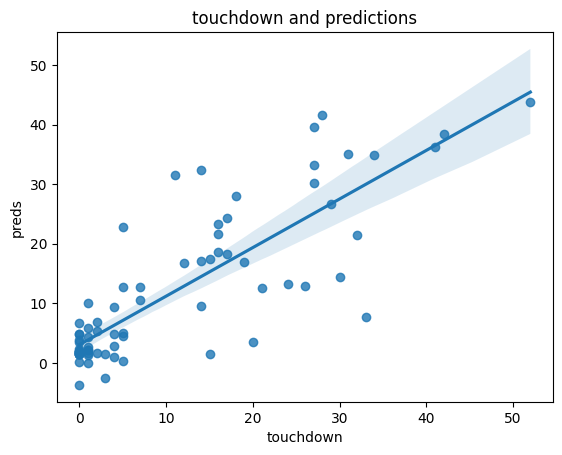

In [18]:
# Let's visualize the outputs 
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

In [19]:
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('touchdown', ascending=False).head(50)

,season,passer_id,passer,touchdown,preds
296,2022,00-0033873,P.Mahomes,52.0,43.773075
338,2022,00-0036442,J.Burrow,42.0,38.465752
310,2022,00-0034857,J.Allen,41.0,36.171686
262,2022,00-0029604,K.Cousins,34.0,34.953044
265,2022,00-0030565,G.Smith,33.0,7.799100
284,2022,00-0033106,J.Goff,32.0,21.522589
283,2022,00-0033077,D.Prescott,31.0,34.999742
345,2022,00-0036971,T.Lawrence,30.0,14.429281
336,2022,00-0036389,J.Hurts,29.0,26.656970
247,2022,00-0023459,A.Rodgers,28.0,41.606350
